## Libraries


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from keras import layers , Sequential

In [4]:
(x_train , y_train) , (x_test , y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train_flat = x_train.reshape((-1, 28 * 28))
x_test_flat = x_test.reshape((-1, 28 * 28))

In [5]:
lat_space = 32 # Define the latent space dimension

# define the autoencoder architecture

encoder = Sequential([
	layers.Dense(128 , activation = 'relu' , input_shape= (28*28, )),
	layers.Dense(64, activation = 'relu'),
	layers.Dense(lat_space, activation = 'relu')
	])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Task
Build an encoder-classifier model for Fashion MNIST using the existing encoder, train it, evaluate its performance, and report the results.

## Define Classifier Head

### Subtask:
Create a Keras Sequential model for the classifier head. This model will take the output of the encoder (the latent space features) as its input and classify the Fashion MNIST images. It should have an appropriate output layer for multi-class classification.



To define the classifier head model as specified, we will create a Keras Sequential model, add a dense layer with an appropriate number of units and 'relu' activation, and an output dense layer with 10 units and 'softmax' activation for multi-class classification.



In [13]:
classifier_head = Sequential([
    layers.Dense(64, activation='relu', input_shape=(lat_space,)),
    layers.Dense(10, activation='softmax')
])

print("Classifier head model created successfully.")

Classifier head model created successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



The previous code produced a UserWarning regarding `input_shape` in Sequential models. To resolve this and explicitly define the input shape, I will replace the `input_shape` argument in the first Dense layer with an explicit `keras.Input` layer at the beginning of the Sequential model.



In [7]:
classifier_head = Sequential([
    keras.Input(shape=(lat_space,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print("Classifier head model created successfully.")

Classifier head model created successfully.


## Combine Encoder and Classifier

### Subtask:
Construct a new Keras Model by connecting the pre-defined `encoder` model to the newly created `classifier_head`. This will form the complete transfer learning model.



To construct the combined encoder-classifier model, I will define an input layer, pass it through the existing `encoder` model, then pass the encoder's output through the `classifier_head` model, and finally create a new `keras.Model` from these layers.



In [8]:
input_layer = keras.Input(shape=(28 * 28,))
encoded_output = encoder(input_layer)
classification_output = classifier_head(encoded_output)

encoder_classifier_model = keras.Model(inputs=input_layer, outputs=classification_output)

print("Encoder-classifier model created successfully.")
encoder_classifier_model.summary()

Encoder-classifier model created successfully.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32)             │       110,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 10)             │         2,762 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,578 (443.66 KB)

 Trainable params: 113,578 (443.66 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

### Subtask:
Compile the combined encoder-classifier model. Choose an appropriate optimizer (e.g., 'adam'), loss function (e.g., 'sparse_categorical_crossentropy' since `y_train` is integer labels), and metrics (e.g., 'accuracy').


**Reasoning**:
To compile the combined encoder-classifier model as specified, I will use the `.compile()` method with the 'adam' optimizer, 'sparse_categorical_crossentropy' loss function, and 'accuracy' as the metric.



In [14]:
encoder_classifier_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")

Model compiled successfully.


## Train the Model

### Subtask:
Train the combined model using the `x_train_flat` and `y_train` data. Specify the number of epochs and batch size. Consider adding validation data (`x_test_flat`, `y_test`) to monitor performance during training.


**Reasoning**:
To train the combined model, I will use the `.fit()` method with the specified training data, epochs, batch size, and validation data.



In [10]:
history = encoder_classifier_model.fit(
    x_train_flat,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test_flat, y_test)
)

print("Model training complete.")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7341 - loss: 0.7544 - val_accuracy: 0.8365 - val_loss: 0.4433
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8556 - loss: 0.3923 - val_accuracy: 0.8407 - val_loss: 0.4359
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8732 - loss: 0.3453 - val_accuracy: 0.8654 - val_loss: 0.3637
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8818 - loss: 0.3174 - val_accuracy: 0.8699 - val_loss: 0.3566
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8873 - loss: 0.2964 - val_accuracy: 0.8621 - val_loss: 0.3775
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8919 - loss: 0.2878 - val_accuracy: 0.8775 - val_loss: 0.3420
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8959 - loss: 0.2801 - val_accuracy: 0.8716 - val_loss: 0.3621
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8986 - loss: 0.2687 - val_accuracy: 0.

## Analyze Training History and Evaluate Model

### Subtask:
After training the model, analyze its training history and evaluate its final performance on the test dataset. This involves plotting the training and validation loss/accuracy over epochs and then calculating the final loss and accuracy on the untouched test set.

#### Instructions
1. Plot the training and validation accuracy over epochs.
2. Plot the training and validation loss over epochs.
3. Evaluate the `encoder_classifier_model` on `x_test_flat` and `y_test` to get the final test loss and accuracy.

**Reasoning**:
To analyze the training history, I will plot the training and validation accuracy and loss over epochs using the `history` object obtained from model training.



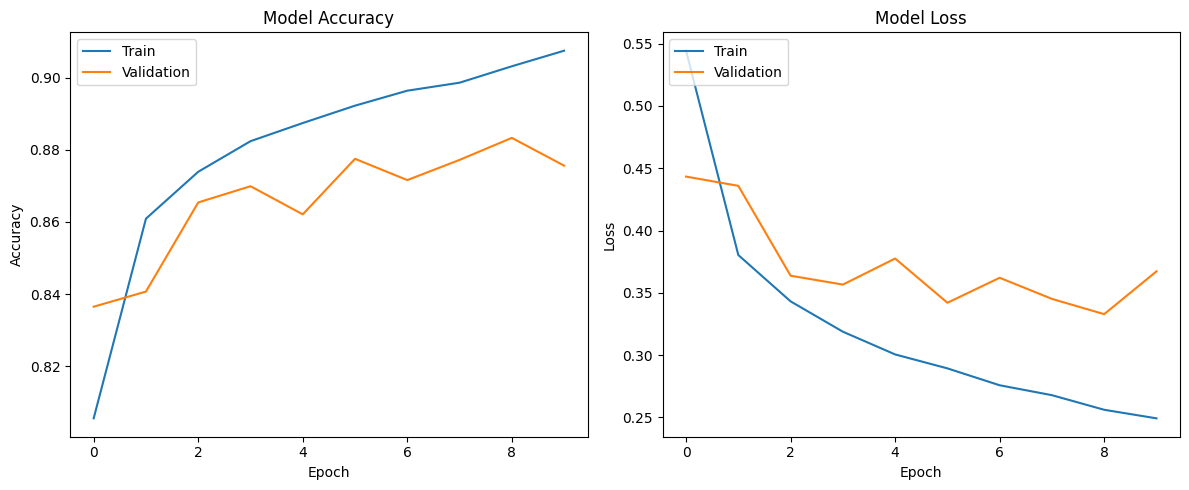

Plotted training and validation accuracy and loss.


In [11]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

print("Plotted training and validation accuracy and loss.")

**Reasoning**:
The training history plots have been generated. The next step is to evaluate the trained model on the test dataset to obtain the final test loss and accuracy as specified in the subtask instructions.



In [12]:
test_loss, test_accuracy = encoder_classifier_model.evaluate(x_test_flat, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.3673
Test Accuracy: 0.8756


## Final Task

### Subtask:
Summarize the steps taken to build and train the encoder-classifier model, and report its final performance on the test set.


## Summary:

### Q&A
The steps taken to build and train the encoder-classifier model included: defining a Keras `Sequential` model for the classifier head, combining it with the pre-defined encoder to form a new `keras.Model`, compiling this combined model with an appropriate optimizer and loss function, and finally training it on the Fashion MNIST dataset. The final performance on the test set was a Test Loss of 0.3673 and a Test Accuracy of 0.8756.

### Data Analysis Key Findings
*   A `classifier_head` Keras `Sequential` model was successfully created with a `keras.Input` layer, a `Dense` layer with 64 units and 'relu' activation, and an output `Dense` layer with 10 units and 'softmax' activation.
*   The `encoder_classifier_model` was constructed by connecting the pre-defined `encoder` to the `classifier_head`, resulting in a model with a total of 113,578 trainable parameters.
*   The combined model was compiled using the 'adam' optimizer, 'sparse\_categorical\_crossentropy' as the loss function, and 'accuracy' as the metric.
*   The model was trained for 10 epochs using a batch size of 64, with `x_train_flat` and `y_train` for training and `(x_test_flat, y_test)` for validation.
*   Upon evaluation, the trained `encoder_classifier_model` achieved a **Test Loss of 0.3673** and a **Test Accuracy of 0.8756** on the unseen test dataset.
*   Plots of training and validation accuracy and loss over epochs were generated, providing a visual representation of the model's learning process.

### Insights or Next Steps
*   The model demonstrates strong performance on the Fashion MNIST classification task, achieving an accuracy of approximately 87.56% on the test set, suggesting effective feature learning by the encoder and successful classification by the head.
*   Further analysis of the training history plots (e.g., checking for significant divergence between training and validation curves) could inform strategies like early stopping or regularization to potentially prevent overfitting and improve generalization.
